# Bienvenidos a la segunda práctica de Física Computacional 2024-2 
* Alumna Ayudante: Valentina Santelices
    * Correo: vsantelices2021@udec.cl
* Alumno Ayudante: Juan Ortega
    * Correo: juortega2019@udec.cl

### Repasemos los conceptos vistos estas últimas semanas:
* Primera derivada adelantada:
$$f'(x) \approx \frac{f(x+h)-f(x)}{h} - \frac{1}{2!}f''(\epsilon^{+})h$$
* Primera derivada retrasada:
$$f'(x) \approx \frac{f(x)-f(x-h)}{h} - \frac{1}{2!}f''(\epsilon^{-})h$$
* Primera derivada centrada:
$$f'(x) \approx \frac{f(x+h)-f(x-h)}{2h} - \frac{1}{3!}f^{(3)}(\epsilon)h^{2}$$

### Errores:
* $\text{Error absoluto = } |\text{Valor real}-\text{Valor aproximado}|$
* $\text{Error relativo = } |\frac{\text{Error absoluto}}{\text{Valor real}} |$
* $\text{Error total = Error computacional + Error propagado}$

## Ejemplo 1.1: estime la segunda derivada centrada de una función.

### Vemos las siguientes expansiones en serie de Taylor:
Expansión entorno al punto $x + h$:

\begin{align*}
f(x+h) & \approx f(x) + f(x)'h + \frac{1}{2!}f''(x)h^{2} + \frac{1}{3!}f^{(3)}(x)h^{3} + \frac{1}{4!}f^{(4)}(x)h^{4} + ... 
\end{align*}

Expansión entorno al punto $x - h$:
\begin{align*}
f(x-h) & \approx f(x) - f'(x)h + \frac{1}{2!}f''(x)h^{2} - \frac{1}{3!}f^{(3)}(x)h^{3} + \frac{1}{4!}f^{(4)}(x)h^{4} + ...
\end{align*}

Sumamos ambas expresiones

$$ f(x+h) + f(x-h) \approx 2f(x) + f''(x)h^{2} + \frac{2}{4!}f^{(4)}(x)h^{4} + ...
$$

Despejamos $f''(x)$

$$ f''(x) = \frac{ f(x+h) + f(x-h) -2f(x)}{h^{2}} - \frac{2}{4!}f^{(4)}(\epsilon)h^{2}
$$

En donde $E(h) = - \frac{2}{4!}f^{(4)}(\epsilon)h^{2}$ es el error analítico de orden $O(h^{2})$ y además $x-h<\epsilon<x+h$.



## Ejemplo 1.2: grafique el error absoluto de esta estimación para $f(x) = \sqrt{x}$ en los siguientes puntos.
* $x = 0.1$
* $x = 1.4$
* $x = \frac{\pi}{3}$

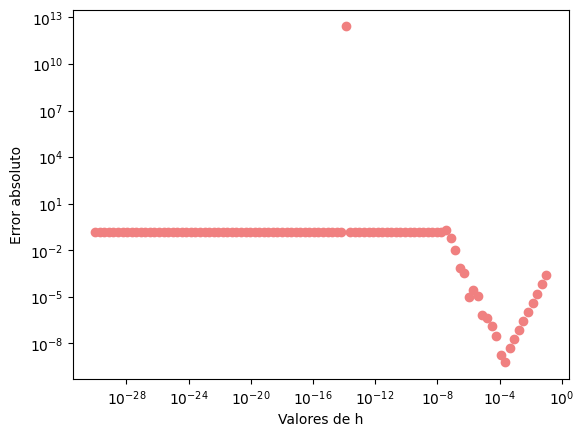

In [2]:
import numpy as np
import matplotlib.pyplot as plt

h = np.geomspace(0.1, 1e-30, 100)
x = 1.4
f = np.sqrt

deriv2_centrada = ( f(x+h) + f(x-h) - 2*f(x) ) / (h**2)
deriv2_analitica = -0.25*(x**(-3/2))

error_absoluto = np.abs(deriv2_centrada - deriv2_analitica)

plt.scatter(h,error_absoluto, color='lightcoral')
plt.xscale('log')
plt.yscale('log')
plt.ylabel("Error absoluto")
plt.xlabel("Valores de h")
plt.show()

## Ejemplo 1.3: Estime el error total y obtenga el $h$ óptimo para esta derivada. 

Gracias al cálculo anterior podemos determinar el valor de h para el x elegido:

In [3]:
error_min = np.argmin(error_absoluto)
print(h[error_min])

0.00023101297000831605


Debemos estimar ahora el error analítico. Para ello en primer lugar realizamos las aproximaciones $\overline{f(x)} = f(x)(1+\epsilon_0)$, $\overline{f(x+h)} = f(x+h)(1+\epsilon^{+})$ y $\overline{f(x+h)} = f(x+h)(1+\epsilon^{-})$, donde $\epsilon_0$, $\epsilon^{+}$ y $\epsilon^{-}$ son los errores de redondeo asociados a cada expansión. De este modo, la derivada es la siguiente:

\begin{align*}
& f''(x) \approx \frac{ \overline{f(x+h)} + \overline{f(x-h)} - 2\overline{f(x)} }{h^{2}} - \frac{2}{4!}f^{(4)}(\epsilon)h^{2} \\
& f''(x) - \frac{ f(x+h)(1+\epsilon^{+}) + f(x-h)(1+\epsilon^{-}) - 2f(x)(1+\epsilon_{0}) }{h^{2}} = - \frac{2}{4!}f^{(4)}(\epsilon)h^{2} \\
& f''(x) - \frac{ f(x+h) + f(x-h) - 2f(x) }{h^{2}} = - \frac{2}{4!}f^{(4)}(\epsilon)h^{2} + \frac{ f(x+h)\epsilon^{+} + f(x-h)\epsilon^{-} - 2f(x)\epsilon_0 }{h^{2}}
\end{align*} \\

aplicamos la desigualdad triangular

\begin{align*}

\left| f''(x) - \frac{ f(x+h) + f(x-h) - 2f(x) }{h^{2}} \right| \leq \frac{2}{4!}\left|f^{(4)}(\epsilon)h^{2}\right| + \left|\frac{f(x+h)}{h^{2}}\right|\epsilon^{+} + \left|\frac{f(x-h)}{h^{2}}\right|\epsilon^{-} + \left|\frac{2f(x)}{h^{2}}\right|\epsilon_0

\end{align*}

asumimos que existe un $\xi$ tal que $\epsilon_0 \leq \xi$, $\epsilon^{+} \leq \xi$, $\epsilon^{-} \leq \xi$, donde $\xi$ viene siendo el error de presición. Y además que, si $h<<1$, entonces $\epsilon \approx x$ (teorema del sandwich) y también $|f(x \pm h)| \approx |f(x)|$, así se tiene 

\begin{align*}

\text{Error absoluto} &\leq \frac{2}{4!}\left|f^{(4)}(x)h^{2}\right| + \left|\frac{f(x)}{h^{2}}\right|\xi + \left|\frac{f(x)}{h^{2}}\right|\xi + \left|\frac{2f(x)}{h^{2}}\right|\xi \\
            &\leq \frac{2}{4!}\left|f^{(4)}(x)h^{2}\right| + 4\left|\frac{f(x)}{h^{2}}\right|\xi

\end{align*}

Finalmente, 

$$ \text{Error total} = \frac{2}{4!}\left|f^{(4)}(x)\right|h^{2} + 4\frac{\left|f(x)\right|}{h^{2}}\xi
$$

Notar que $\frac{2}{4!}\left|f^{(4)}(x)h^{2}\right|$ corresponde al error de truncamiento mientras que $4\left|\frac{f(x)}{h^{2}}\right|\xi$ corresponde al error del computador. Al momento de visualizar las gráficas del item anterior, como éstas están en escala logarítmica, la pendiente positiva corresponde al logaritmo del error por truncamiento, mientras que la negativa está asociada al logaritmo del error computacional.

Derivamos esta expresión para obtener el $h$ óptimo:

\begin{align*}
\frac{d}{dh}\text{Error total} &= \frac{d}{dh}\left( \frac{2}{4!}\left|f^{(4)}(x)\right|h^{2} + 4\frac{\left|f(x)\right|}{h^{2}}\xi \right) \\
                                   &= \frac{4}{4!}\left|f^{(4)}(x)\right|h - 8\frac{|f(x)|}{h^{3}}\xi
\end{align*}

igualamos a cero esta expresión, así

\begin{align*}

&\frac{4}{4!}\left|f^{(4)}(x)\right|h - 8\frac{|f(x)|}{h^{3}}\xi = 0 \\
&\frac{1}{6}\left|f^{(4)}(x)\right|h^{4} - 8|f(x)|\xi = 0 \\
&h^{4} = 48 \left| \frac{f(x)}{f^{(4)}(x)} \right| \xi \\
&h = \left( 48 \left| \frac{f(x)}{f^{(4)}(x)} \right| \xi \right)^{1/4}

\end{align*}

Cabe recalcar que el $h$ óptimo dependerá del valor de $x$, por ende (como se visualizó en las gráficas) cada $x$ tendrá su propio $h$ óptimo. Debido a ello, para evitar tener que calcular cada vez el $h$ más conveniente, se estima un margen de error que sea suficiente para dar con una buena aproximación de la derivada, por ejemplo, $h\approx 10^{-3}$.

## Ejemplo 1.4: Grafique la segunda derivada centrada y compárela con la segunda derivada analítica.

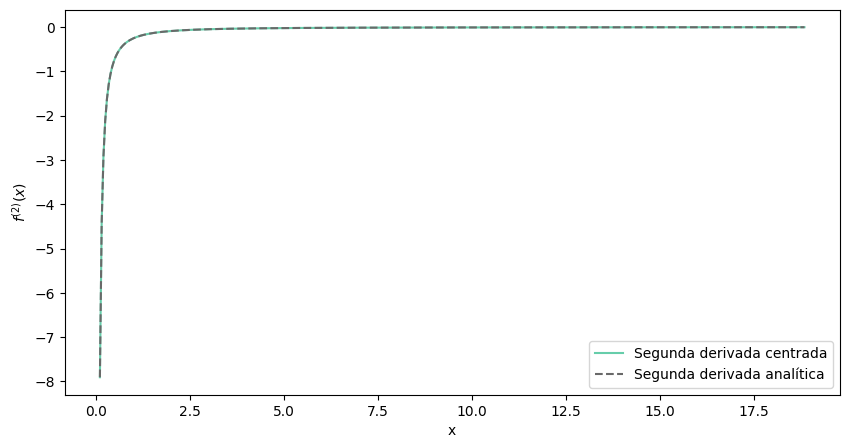

In [4]:
##### Forma 1 (con lambda)#####
h = 1e-3
x = np.linspace(0.1, 6 * np.pi, 400)

f_elegida = lambda x: np.sqrt(x)
f_deriv2 = lambda x: -0.25*(x**(-3/2))

deriv2_centrada = lambda f, x, h: ( f(x+h) + f(x-h) - 2*f(x) ) / (h**2)

f_2_centrada = deriv2_centrada(f_elegida,x,h)
f_2_analitica = f_deriv2(x)


plt.figure(figsize=(10, 5))

plt.plot(x,f_2_centrada, label='Segunda derivada centrada', color='mediumaquamarine')
plt.plot(x,f_2_analitica, label='Segunda derivada analítica', color='dimgray', linestyle='--')
plt.ylabel('$f^{(2)}(x)$')
plt.xlabel('x')
plt.legend(loc='lower right')
plt.show()


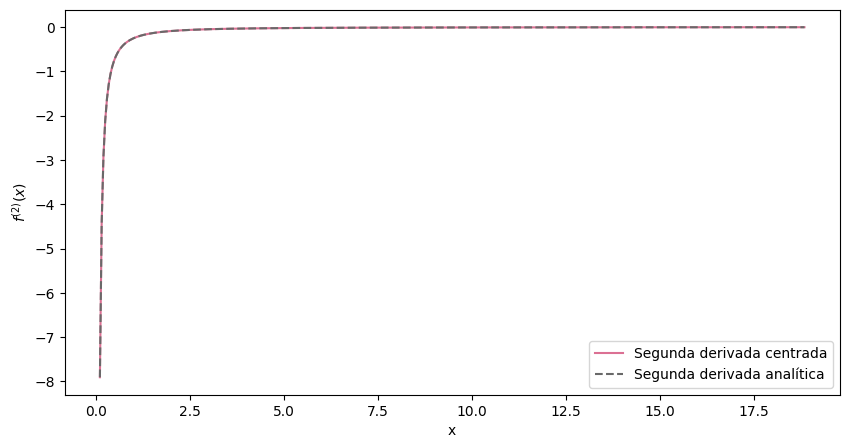

In [5]:
###### Forma 2 (sin lambda) ######
h = 1e-3
x = np.linspace(0.1, 6*np.pi, 400)

f_elegida = np.sqrt
deriv2_real = -0.25*(x**(-3/2))

def deriv2_centrada(f,x,h):
    return ( f(x+h) + f(x-h) - 2*f(x) ) / (h**2)

f_2_centrada = deriv2_centrada(f_elegida, x, h)

plt.figure(figsize=(10, 5))
plt.plot(x, f_2_centrada, label= 'Segunda derivada centrada', color= 'palevioletred')
plt.plot(x, deriv2_real, label = 'Segunda derivada analítica', color='dimgray', linestyle='--')
plt.ylabel('$f^{(2)}(x)$')
plt.xlabel('x')
plt.legend(loc='lower right')
plt.show()